# Avaliação de Desempenho do Protocolo TCP em condições de congestionamento: cubic x reno 
 
**Alunos:** 
 - João Negri, 
 - Matheus Medeiros, 
 - Vinicius Tonini

## imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import seaborn as sns  # Optional for styling

## Abertura dos dados e pré tratamento

In [3]:
n = 8

df = pd.read_csv('cliente.csv')


print(df.head())

cubics = df[df['proto'].str.contains('cubic',case=False)]

renos = df[df['proto'].str.contains('reno',case=False)]

media_cubic = cubics['bps'].mean()
# print('Cubic obteve uma média de transmissão de ',np.round(media_cubic/1000000,2) ,'Mbps')
media_reno = renos['bps'].mean()
# print('Reno obteve uma média de transmissão de ',np.round(media_reno/1000000,2),'Mbps')

# print('Reno está com uma eficácia de ',renos['bps'].mean() / cubics['bps'].mean() *100,'%')

t = 3.4995 #tabela 99% de confiança e 8 repeticoes
# np.random.standard_t()

# scipy.stats.

   rep proto      ber  e2e_delay         vel                time    addrsrc  \
0    0  reno   100000      10000  500000kbps  20230919210244.374  10.0.3.20   
1    0  reno   100000     100000  500000kbps  20230919210429.102  10.0.3.20   
2    0  reno   100000      10000  700000kbps  20230919210510.177  10.0.3.20   
3    0  reno   100000     100000  700000kbps  20230919210655.692  10.0.3.20   
4    0  reno  1000000      10000  500000kbps  20230919210737.919  10.0.3.20   

   portsrc   addrdest  portdest  nsei    nsei.1  transfbits         bps  
0  49956.0  10.0.0.20    5001.0   3.0  0.0-30.3  15073280.0   3978405.0  
1  55140.0  10.0.0.20    5001.0   3.0  0.0-31.2   1835008.0    470320.0  
2  54804.0  10.0.0.20    5001.0   3.0  0.0-30.1  11534336.0   3061956.0  
3  33684.0  10.0.0.20    5001.0   3.0  0.0-32.4   1966080.0    485497.0  
4  48658.0  10.0.0.20    5001.0   3.0  0.0-30.2  86245376.0  22851239.0  


## Objetivo

Avaliar o comportamento de dois algoritmos de controle de congestionamento (cubic e reno) utilizando o software de simulação Imunes e a ferramenta de análise de desempenho de rede Iperf2

## Métricas usadas para ADS

Taxa de transmissão média

## Parâmetros Fixados

- Trafego de background: UDP
- Fluxo avaliado: TCP
- Link entre dispositivos: 1Gbps
- Tempo de execução do servidor: 50 s
- Topologia a seguir:


![Alt text](img/topologia.png)


## Fatores e Níveis

- Protocolos:
  - Cubic
  - Reno
- BER: 
  - 1/1000000
  - 1/100000
- Tráfego de background:
  - 500000kbps
  - 700000kbps
- End to end delay:
  - 10000  us
  - 100000 us


## Técnicas usadas para avaliação

Simulação utilizando Imunes2 e Iperf.

## Resultados

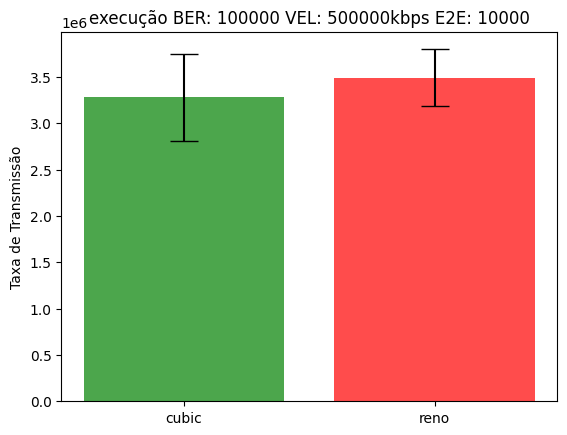

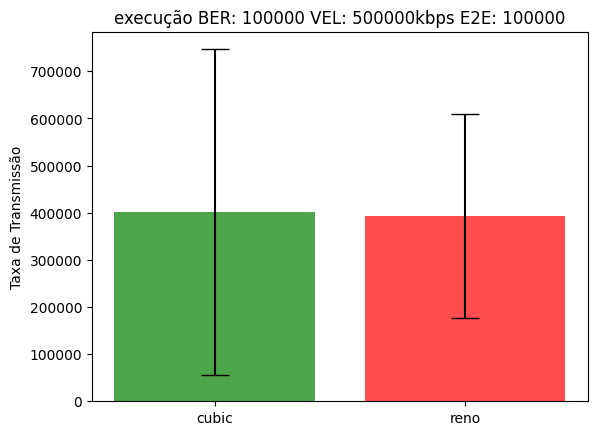

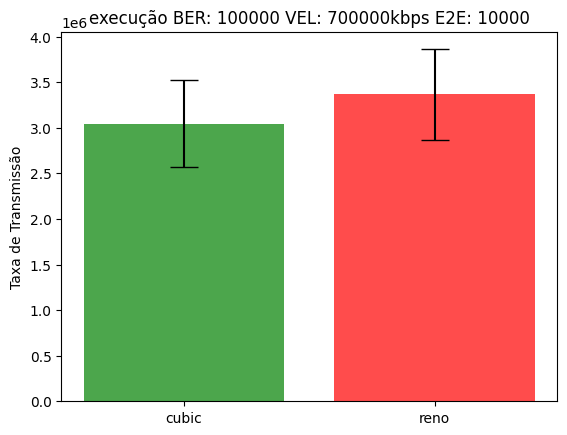

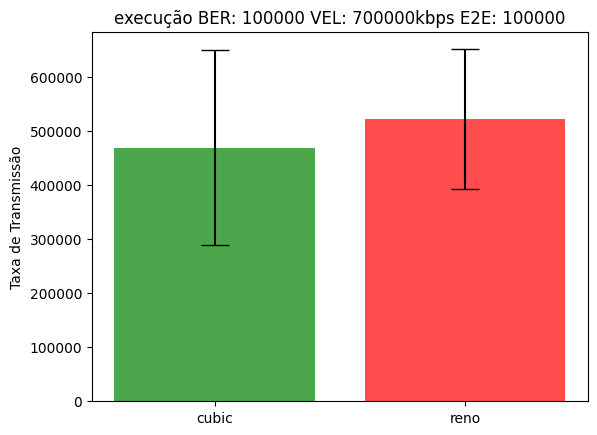

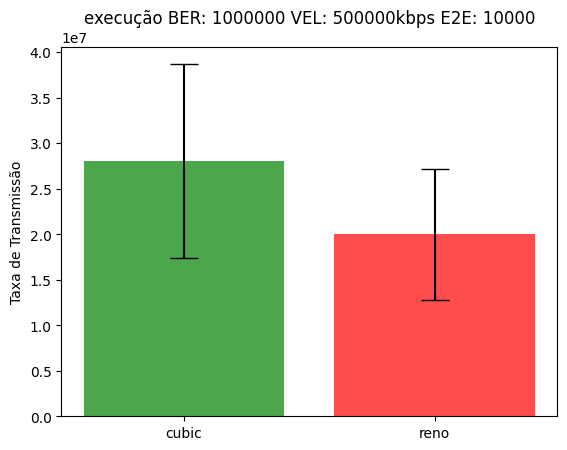

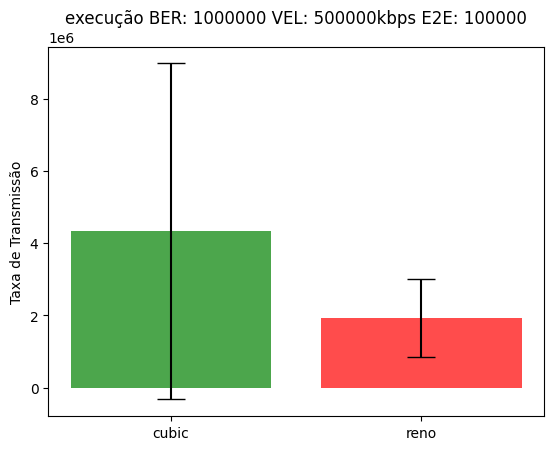

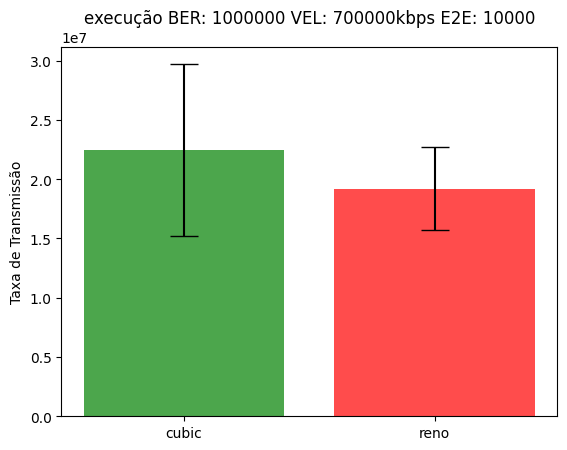

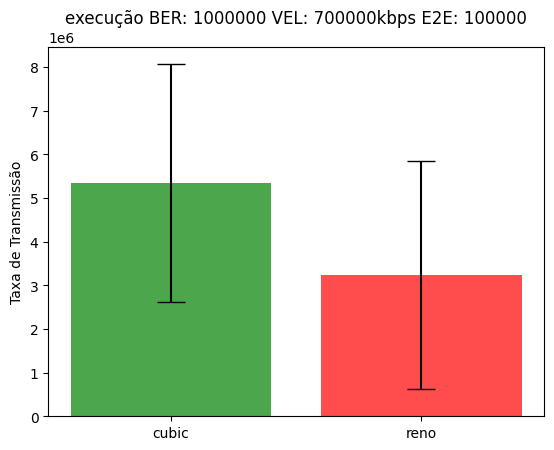

In [17]:
cubic = []
reno = []
# for proto in df['proto'].unique():
for ber in df['ber'].unique():
    for vel in df['vel'].unique():
        for e2e in df['e2e_delay'].unique():
            
            df_filtrado_cubic = df[(df['proto'] == 'cubic') & (df['ber'] == ber) & (df['e2e_delay'] == e2e) & (df['vel'] == vel)]
            df_filtrado_reno = df[(df['proto'] == 'reno') & (df['ber'] == ber) & (df['e2e_delay'] == e2e) & (df['vel'] == vel)]
            
            intervalo_cubic = t*(df_filtrado_cubic['bps'].std()/np.sqrt(len(df_filtrado_cubic['bps'])))
            intervalo_reno = t*(df_filtrado_reno['bps'].std()/np.sqrt(len(df_filtrado_reno['bps'])))

            intervalo_inf_cubic = df_filtrado_cubic['bps'].mean() - t*(df_filtrado_cubic['bps'].std()/np.sqrt(len(df_filtrado_cubic['bps'])))
            intervalo_sup_cubic = df_filtrado_cubic['bps'].mean() + t*(df_filtrado_cubic['bps'].std()/np.sqrt(len(df_filtrado_cubic['bps'])))

            intervalo_inf_reno = df_filtrado_reno['bps'].mean() - t*(df_filtrado_reno['bps'].std()/np.sqrt(len(df_filtrado_reno['bps'])))
            intervalo_sup_reno = df_filtrado_reno['bps'].mean() + t*(df_filtrado_reno['bps'].std()/np.sqrt(len(df_filtrado_reno['bps'])))

            

            plt.bar( 'cubic', df_filtrado_cubic['bps'].mean(), yerr=intervalo_cubic, align='center', alpha=0.7, ecolor='black', capsize=10, color='g', label='Cubic')

            plt.bar( 'reno', df_filtrado_reno['bps'].mean(),yerr=intervalo_reno, align='center', alpha=0.7, ecolor='black', capsize=10, color='r', label='Reno')


            # plt.axvline(df_filtrado_cubic['bps'].mean(), ls='--', color='g')
            # print('cubic',df_filtrado_cubic['bps'].mean()/1000000,'Mbps')
            
            # plt.axvline(df_filtrado_reno['bps'].mean(), ls='--', color='r')
            # print('reno',df_filtrado_reno['bps'].mean()/1000000,'Mbps')
            
            plt.ylabel('Taxa de Transmissão')
            plt.title(f'execução BER: {ber} VEL: {vel} E2E: {e2e}')
            plt.show()

***
### **Análise dos dados**

A simulação que obteve a **melhor** taxa de transmissão tem os seguintes parâmetros: 
- BER: 1/1000000
- Protocolo: Cubic
- Tráfego de background: 500000kbps 
- End to end delay: 10000 us

Ele obteve a taxa de transmissão de : 28.01 Mbps

![Alt text](image.png)


A simulação que obteve a **pior** taxa de transmissão tem os seguintes parâmetros: 
- BER: 1/100000
- Protocolo: Reno
- Tráfego de background: 500000kbps 
- End to end delay: 100000 us

Ele obteve a taxa de transmissão de : 0.39 Mbps

![Alt text](image-1.png)

Comparando as simulações Reno e Cubic é possível analisar que 

| Cubic (Mbps) | Reno (Mbps) |
|--------------|-------------|
| 3.28         | 3.49        |
| 0.4          | 0.39        |
| 3.04         | 3.37        |
| 0.47         | 0.52        |
| 28.01        | 19.97       |
| 4.32         | 1.93        |
| 22.44        | 19.2        |
| 5.34         | 3.24        |

